# *CODE FOR ALGOS PAPER*

THIS PYTHON SCRIPT CONTAINS CODE FOR THE FOLLOWING ANALYSES:<br>
<br>
**SKILL AND PERFORMANCE IN YHR PHYSICAL MOCK-UP** <br>
1. ACHIEVED INTEGRATED SKILL 1ST TRIAL IN THE PHYSICAL MOCK-UP <br>
2. ACHIEVED MEAN INTRAGEATED SKILL (FIRST 5 TRIALS) IN THE PHYSICAL MOCK-UP<br>
3. ACHIEVED INTEGRATED SKILL 1ST TRIAL LS TASK IN THE PHYSICAL MOCK-UP <br>
4. ACHIEVED INTEGRATED SKILL 1ST TRIAL MC TASK IN THE PHYSICAL MOCK-UP <br>
5. ACHIEVED INTEGRATED SKILL 1ST TRIAL TD TASK IN THE PHYSICAL MOCK-UP <br>
<br>
**FLOW SHORT SCALE SURVEY** <br>
1. FLOW EXPERIENCE IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
2. PERCEIVED TASK IMPORTANCE IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
3. ABSORPTION IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
4. FLUENCY IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
5. DEMANDS EXPERIENCE IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
6. SKILLS EXPERIENCE IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
<br>
**AFFECT GRID SURVEY** <br>
1. DELTA PLEASURE IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
2. DELTA AROUSAL IN THE PHYSICAL MOCK-UP AND IN TRAINING <br>
<br>
<br>
**Here I perform Mixed-Anova, One-Way Anova, and Kruskal-Wallis tests depending on the assumption checks done on the R script.** 

In [2]:
#read in necessary packages
import pandas as pd
import itertools as it
from clean import etl
import clean
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import pingouin as pg
from scipy.stats import f_oneway

# **SKILL AND PERFORMANCE IN THE PHYSICAL MOCK-UP**

In [3]:
#read in data
df = pd.read_csv(r'/Users/sandratredinnick/Downloads/cleaned_estherr.csv')
#print(df)

#get algo data
dfALGOS = df[(df['group']=='2U1D_locked') | 
                      (df['group']=='2U1D_unlocked')| 
                      (df['group']=='1U1D')| 
                      (df['group']=='MFP')]
#print(dfALGOS)
dfALGOSP = dfALGOS.loc[dfALGOS['session']==4]
#print(dfALGOSP)

F_onewayResult(statistic=0.5052165008971282, pvalue=0.682070012491228)


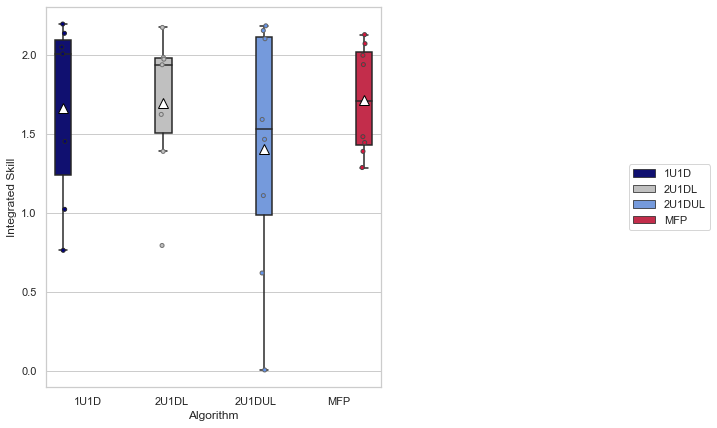

In [27]:
#ACHEIVED INTEGRATED SKILL FOR FIRST TRIAL IN PHYSICAL MOCK-UP

dfALGOSPT1 = dfALGOSP[dfALGOSP['trial']==1]
#print(dfALGOSPT1)
dfALGOSPT12U1DL = dfALGOSPT1[dfALGOSPT1['group']=='2U1D_locked'].dropna()
dfALGOSPT12U1DUL = dfALGOSPT1[dfALGOSPT1['group']=='2U1D_unlocked'].dropna()
dfALGOSPT11U1D = dfALGOSPT1[dfALGOSPT1['group']=='1U1D'].dropna()
dfALGOSPT1MFP = dfALGOSPT1[dfALGOSPT1['group']=='MFP'].dropna()
#print(dfALGOSPT1MFP)

print(f_oneway(dfALGOSPT12U1DL['Integrated_Skill'], 
         dfALGOSPT12U1DUL['Integrated_Skill'], 
         dfALGOSPT11U1D['Integrated_Skill'],
        dfALGOSPT1MFP['Integrated_Skill']))


#plot of 1st trial in physical mock up 
pal = ['#000080', '#C0C0C0', '#6495ED', '#DC143C']
dfALGOSPT1 = dfALGOSPT1.rename(columns={"Integrated_Skill": "Integrated Skill"})
dfALGOSPT1 = dfALGOSPT1.rename(columns={"group": "Algorithm"})
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_locked','2U1DL')
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_unlocked','2U1DUL')
#sns.set(font_scale=2)
plt.figure(figsize=(6,7)) 
sns.set_theme(style='white')
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Integrated Skill", hue="Algorithm",
              data=dfALGOSPT1, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=4,palette=pal,
               legend=False)

sns.boxplot(x="Algorithm", y="Integrated Skill", hue="Algorithm",
            data=dfALGOSPT1,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Achieved Integrated Skill for 1st Trial in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,.6))
plt.show()

KruskalResult(statistic=1.5587569139805433, pvalue=0.6687771374010552)


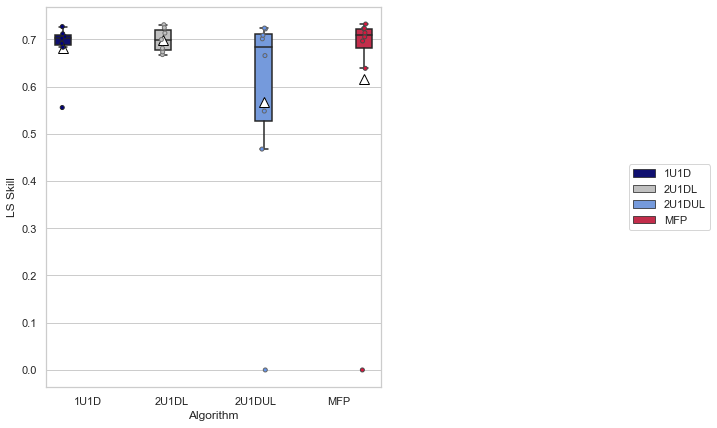

In [26]:
#ACHEIVED INTEGRATED SKILL FOR FIRST TRIAL IN PHYSICAL MOCK-UP LANDING SITE SELECTION TASK 

print(stats.kruskal(dfALGOSPT12U1DL['ls_skill'], 
         dfALGOSPT12U1DUL['ls_skill'], 
         dfALGOSPT11U1D['ls_skill'],
        dfALGOSPT1MFP['ls_skill']))

#plot of 1st trial in physical mock up for landing site task 
pal = ['#000080', '#C0C0C0', '#6495ED', '#DC143C']
dfALGOSPT1 = dfALGOSPT1.rename(columns={"ls_skill": "LS Skill"})
dfALGOSPT1 = dfALGOSPT1.rename(columns={"group": "Algorithm"})
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_locked','2U1DL')
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_unlocked','2U1DUL')
#sns.set(font_scale=2)
plt.figure(figsize=(6,7)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="LS Skill", hue="Algorithm",
              data=dfALGOSPT1, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=4,palette=pal,
               legend=False)

sns.boxplot(x="Algorithm", y="LS Skill", hue="Algorithm",
            data=dfALGOSPT1,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Achieved Skill for the LS Task for 1st Trial in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,.6))
plt.show()

KruskalResult(statistic=2.552073732718881, pvalue=0.4659536543222713)


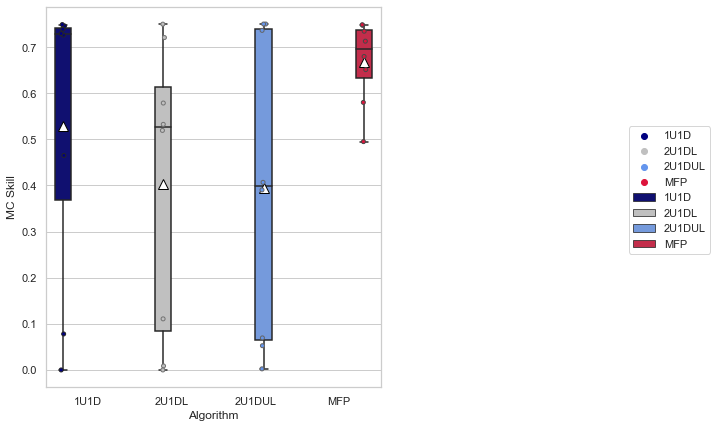

In [28]:
#ACHEIVED INTEGRATED SKILL FOR FIRST TRIAL IN PHYSICAL MOCK-UP MANUAL CONTROL TASK 

print(stats.kruskal(dfALGOSPT12U1DL['mc_skill'], 
         dfALGOSPT12U1DUL['mc_skill'], 
         dfALGOSPT11U1D['mc_skill'],
        dfALGOSPT1MFP['mc_skill']))


#plot of 1st trial in physical mock up for manunal control task 
pal = ['#000080', '#C0C0C0', '#6495ED', '#DC143C']
dfALGOSPT1 = dfALGOSPT1.rename(columns={"mc_skill": "MC Skill"})
dfALGOSPT1 = dfALGOSPT1.rename(columns={"group": "Algorithm"})
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_locked','2U1DL')
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_unlocked','2U1DUL')
#sns.set(font_scale=2)
plt.figure(figsize=(6,7)) 
p=sns.stripplot(x="Algorithm", y="MC Skill", hue="Algorithm",
              data=dfALGOSPT1, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=4,palette=pal)

sns.boxplot(x="Algorithm", y="MC Skill", hue="Algorithm",
            data=dfALGOSPT1,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Achieved Skill for the MC Task for 1st Trial in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,.7))
plt.show()

KruskalResult(statistic=2.4192886290766475, pvalue=0.49005415072778724)


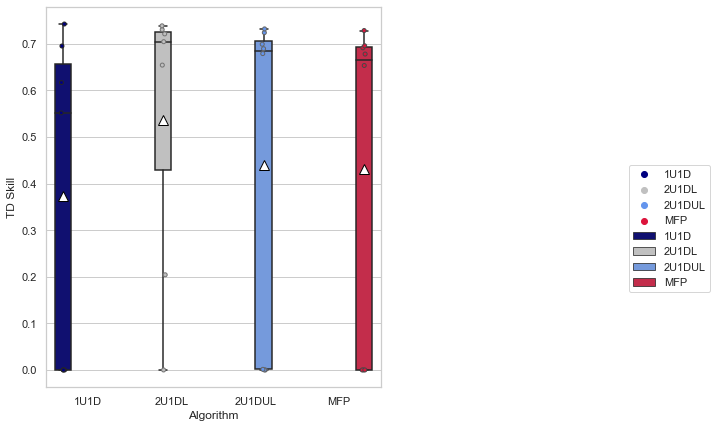

In [29]:
#ACHEIVED INTEGRATED SKILL FOR FIRST TRIAL IN PHYSICAL MOCK-UP terminal descent engine TASK 

print(stats.kruskal(dfALGOSPT12U1DL['de_skill'], 
         dfALGOSPT12U1DUL['de_skill'], 
         dfALGOSPT11U1D['de_skill'],
        dfALGOSPT1MFP['de_skill']))



#plot of 1st trial in physical mock up for terminal descent engine task 
pal = ['#000080', '#C0C0C0', '#6495ED', '#DC143C']
dfALGOSPT1 = dfALGOSPT1.rename(columns={"de_skill": "TD Skill"})
dfALGOSPT1 = dfALGOSPT1.rename(columns={"group": "Algorithm"})
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_locked','2U1DL')
dfALGOSPT1['Algorithm'] = dfALGOSPT1['Algorithm'].str.replace('2U1D_unlocked','2U1DUL')
#sns.set(font_scale=2)
plt.figure(figsize=(6,7)) 
p=sns.stripplot(x="Algorithm", y="TD Skill", hue="Algorithm",
              data=dfALGOSPT1, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=4,palette=pal)

sns.boxplot(x="Algorithm", y="TD Skill", hue="Algorithm",
            data=dfALGOSPT1,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Achieved Skill for the TD Task for 1st Trial in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,.59888))
plt.show()



In [26]:
#ACHEIVED MEAN INTEGRATED SKILL FOR FIRST 5 TRIALS IN THE PHYSICAL MOCKUP
dfALGOSPT15 = dfALGOSP[(dfALGOSP['trial']==1)|
                     (dfALGOSP['trial']==2)|
                      (dfALGOSP['trial']==3)|
                      (dfALGOSP['trial']==4)|
                      (dfALGOSP['trial']==5)]
#print(dfALGOSPT15)
dfALGOSPT152U1DL = dfALGOSPT15[dfALGOSPT15['group']=='2U1D_locked'].dropna()
dfALGOSPT152U1DUL = dfALGOSPT15[dfALGOSPT15['group']=='2U1D_unlocked'].dropna()
dfALGOSPT151U1D = dfALGOSPT15[dfALGOSPT15['group']=='1U1D'].dropna()
dfALGOSPT15MFP = dfALGOSPT15[dfALGOSPT15['group']=='MFP'].dropna()
#print(dfALGOSPT1MFP)

print(f_oneway(dfALGOSPT152U1DL['Integrated_Skill'], 
         dfALGOSPT152U1DUL['Integrated_Skill'], 
         dfALGOSPT151U1D['Integrated_Skill'],
        dfALGOSPT15MFP['Integrated_Skill']))


print(stats.kruskal(dfALGOSPT152U1DL['Integrated_Skill'], 
         dfALGOSPT152U1DUL['Integrated_Skill'], 
         dfALGOSPT151U1D['Integrated_Skill'],
        dfALGOSPT15MFP['Integrated_Skill']))

F_onewayResult(statistic=1.304075243153296, pvalue=0.27521330967747476)
KruskalResult(statistic=1.8535987767096458, pvalue=0.6033412694242783)


**Will update achieved mean skill analyses as we finalize the analysis in our meeting during the week of 5/29**

# **FLOW SHORT SCALE SURVEY**

In [54]:
# read in data 
flowdat = pd.read_csv(r'/Users/sandratredinnick/Downloads/Flow Data_PubPaper - Form Responses 1-2.csv')

#get data for algo paper only 
flowdatALGOS = flowdat[(flowdat['Training Condition']=='2U1DL') | 
                      (flowdat['Training Condition']=='2U1DUL')| 
                      (flowdat['Training Condition']=='1U1DL')| 
                      (flowdat['Training Condition']=='MFP')]

#get training data 
flowdatALGOST = flowdatALGOS.loc[flowdatALGOS['Session'] != 4]
#print(flowdatALGOST)

#get physical mock up data 
flowdatALGOSP = flowdatALGOS[flowdatALGOS['Session']==4]
#print(flowdatALGOSP)


ANOVA SUMMARY

Source                 SS    DF1    DF2     MS      F    p-unc    np2      eps
------------------  -----  -----  -----  -----  -----  -------  -----  -------
Training Condition  1.845      3     28  0.615  1.316    0.289  0.124  nan
Session             0.883      2     56  0.442  2.308    0.109  0.076    0.873
Interaction         3.474      6     56  0.579  3.026    0.012  0.245  nan



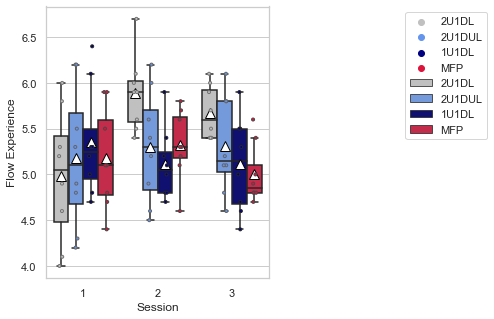

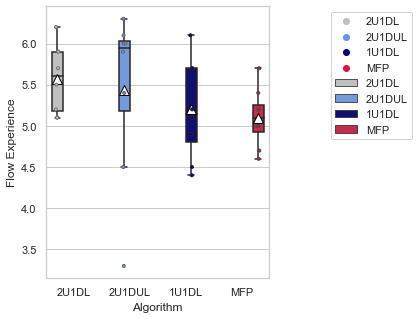

In [55]:
#FLOW EXPERIENCE
#flowdatALGOST = flowdatALGOST.rename(columns={"Training Condition": "Algorithm"})
flowdatALGOST = flowdatALGOST.rename(columns={"Flow.Experience": "Flow Experience"})

#mixed anova in training 
FEMA = pg.mixed_anova(data=flowdatALGOST, dv='Flow Experience', between='Training Condition', within='Session',
                     subject='Id', correction=False)
pg.print_table(FEMA)

#significant interaction 


#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Training Condition']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Training Condition']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Training Condition']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Training Condition']=='MFP']
stats.kruskal(FE_2U1DL['Flow Experience'], 
         FE_2U1DUL['Flow Experience'], 
         FE_1U1DL['Flow Experience'],
        FE_MFP['Flow Experience'])


#plot in training 
pal = ['#C0C0C0', '#6495ED', '#000080', '#DC143C']
flowdatALGOST = flowdatALGOST.rename(columns={"Training Condition": "Algorithm"})
flowdatALGOST = flowdatALGOST.rename(columns={"Flow.Experience": "Flow Experience"})
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.figure(figsize=(4,5)) 
p= sns.stripplot(x="Session", y="Flow Experience", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Flow Experience", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Flow Experience Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()
sns.set_style("whitegrid")


#plot of flow experience in physical mock up 
pal = ['#C0C0C0', '#6495ED', '#000080', '#DC143C']
flowdatALGOSP = flowdatALGOSP.rename(columns={"Training Condition": "Algorithm"})
flowdatALGOSP = flowdatALGOSP.rename(columns={"Flow.Experience": "Flow Experience"})
#sns.set(font_scale=2)
plt.figure(figsize=(4,5)) 
p=sns.stripplot(x="Algorithm", y="Flow Experience", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Flow Experience", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Flow Experience Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (1.25,1))
plt.show()


ANOVA SUMMARY

Source           SS    DF1    DF2      MS      F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -----  -------  -----  -------
Algorithm    32.448      3     28  10.816  1.878    0.156  0.167  nan
Session       0.294      2     56   0.147  0.515    0.600  0.018    0.995
Interaction   1.437      6     56   0.240  0.840    0.544  0.083  nan



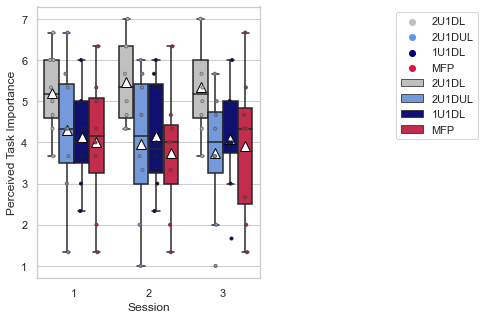

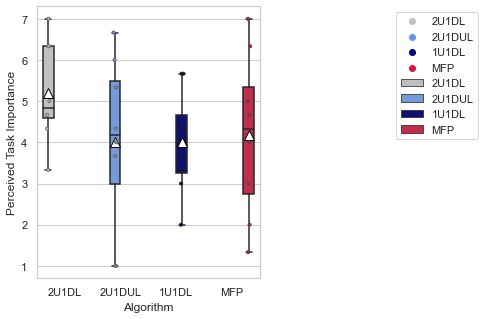

In [59]:
#PERCEIVED TASK IMPORTANCE

#mixed anova in training 
PIMA = pg.mixed_anova(data=flowdatALGOST, dv='Perceived Task Importance', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(PIMA)



#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
f_oneway(FE_2U1DL['Perceived Task Importance'], 
         FE_2U1DUL['Perceived Task Importance'], 
         FE_1U1DL['Perceived Task Importance'],
        FE_MFP['Perceived Task Importance'])
 
#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Perceived Task Importance", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Perceived Task Importance", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Perceived Task Importance Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()


#plot of perceived task importance in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Perceived Task Importance", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Perceived Task Importance", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Perceived Task Importance Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()





ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Algorithm    0.260      3     28  0.087  0.115    0.950  0.012  nan
Session      1.314      2     56  0.657  2.418    0.098  0.079    0.935
Interaction  4.392      6     56  0.732  2.693    0.023  0.224  nan



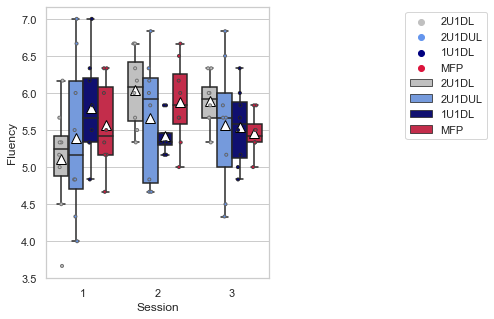

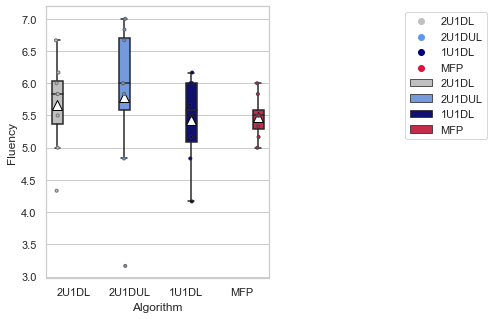

In [60]:
#FLUENCY

#mixed anova in training 
FLMA = pg.mixed_anova(data=flowdatALGOST, dv='Fluency', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(FLMA)

#significant interaction 


#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
stats.kruskal(FE_2U1DL['Fluency'], 
         FE_2U1DUL['Fluency'], 
         FE_1U1DL['Fluency'],
        FE_MFP['Fluency'])


#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Fluency", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Fluency", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Fluency Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()


#plot of Fluency in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Fluency", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Fluency", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Fluency Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()




ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Algorithm    8.919      3     28  2.973  4.279    0.013  0.314  nan
Session      0.438      2     56  0.219  0.669    0.516  0.023    0.779
Interaction  3.167      6     56  0.528  1.614    0.160  0.147  nan



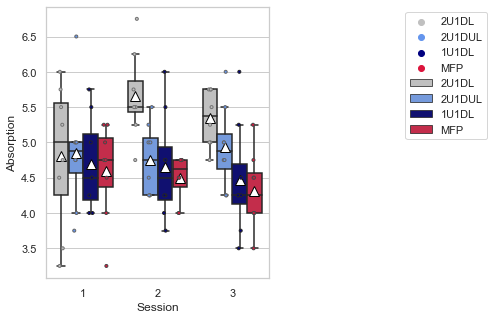

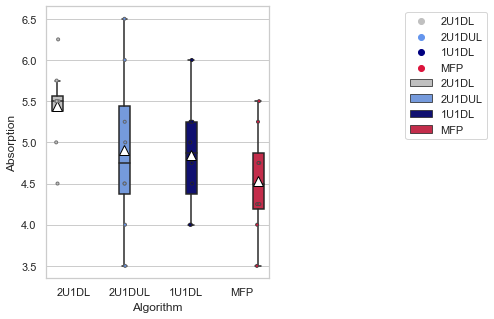

In [61]:
#ABSORPTION

#mixed anova in training 
ABMA = pg.mixed_anova(data=flowdatALGOST, dv='Absorption', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(ABMA)

#not signficant 


#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
f_oneway(FE_2U1DL['Absorption'], 
         FE_2U1DUL['Absorption'], 
         FE_1U1DL['Absorption'],
        FE_MFP['Absorption'])


#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Absorption", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Absorption", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Absorption Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()


#plot of Absorption in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Absorption", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Absorption", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Absorption Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()





ANOVA SUMMARY

Source           SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  ------  -----  -----  -----  -----  -------  -----  -------
Algorithm    19.615      3     28  6.538  0.896    0.455  0.088  nan
Session       7.750      2     56  3.875  2.849    0.066  0.092    0.890
Interaction   3.417      6     56  0.569  0.419    0.864  0.043  nan



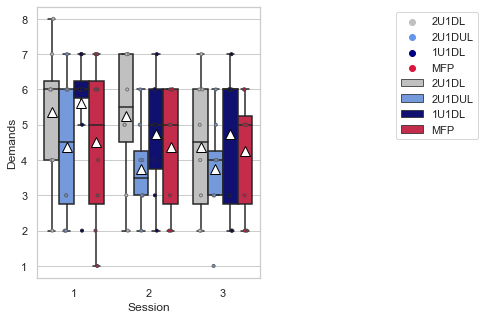

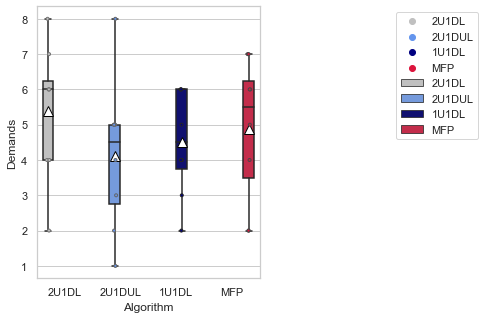

In [62]:
#DEMANDS

#mixed anova in training 
DEMA = pg.mixed_anova(data=flowdatALGOST, dv='Demands', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(DEMA)

#not signficant 


#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
f_oneway(FE_2U1DL['Demands'], 
         FE_2U1DUL['Demands'], 
         FE_1U1DL['Demands'],
        FE_MFP['Demands'])



#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Demands", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Demands", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Demand Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()



#plot of demands in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Demands", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Demands", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Demand Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()







ANOVA SUMMARY

Source           SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  ------  -----  -----  -----  -----  -------  -----  -------
Algorithm     3.281      3     28  1.094  0.137    0.937  0.015  nan
Session      13.396      2     56  6.698  6.243    0.004  0.182    0.759
Interaction   3.188      6     56  0.531  0.495    0.809  0.050  nan



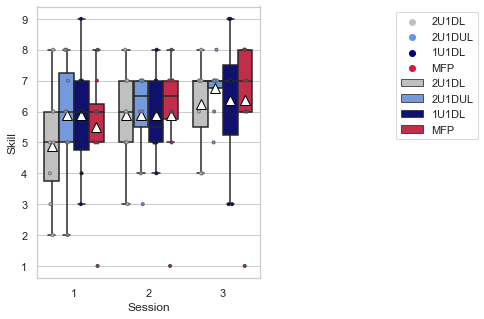

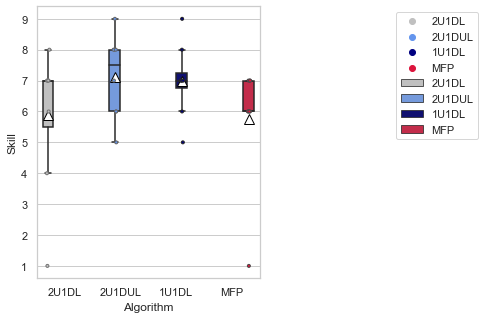

In [64]:
#SKILL

#mixed anova in training 
SKMA = pg.mixed_anova(data=flowdatALGOST, dv='Skill', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(SKMA)

#not signficant 


#kruskal in physical mock-up because normality is broken
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
stats.kruskal(FE_2U1DL['Skill'], 
         FE_2U1DUL['Skill'], 
         FE_1U1DL['Skill'],
        FE_MFP['Skill'])


#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Skill", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Skill", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Skill Scores in Training')
p.legend(bbox_to_anchor= (2,1))
plt.show()




#plot of skills in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Skill", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Skill", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Skill Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()




ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Algorithm    5.281      3     28  1.760  1.100    0.365  0.105  nan
Session      0.062      2     56  0.031  0.048    0.953  0.002    0.945
Interaction  2.938      6     56  0.490  0.755    0.608  0.075  nan



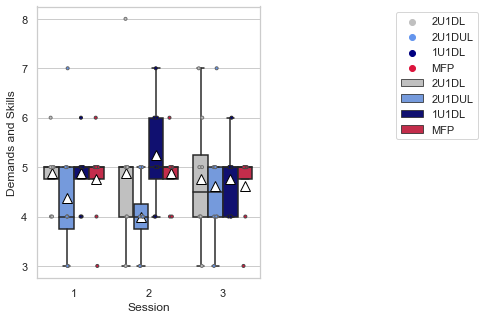

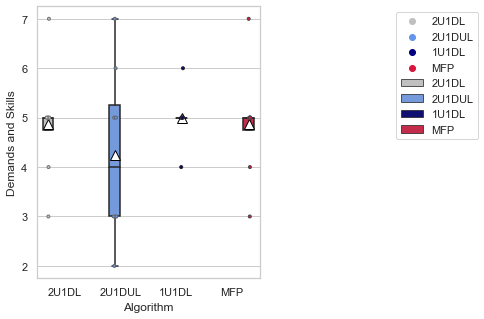

In [67]:
#SKILLS AND DEMANDS 

#mixed anova in training 
DESKMA = pg.mixed_anova(data=flowdatALGOST, dv='Demands and Skills', between='Algorithm', within='Session',
                     subject='Id', correction=False)
pg.print_table(DESKMA)

#not signficant but almost 


#one way anova in physical mock-up
FE_2U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DL']
FE_2U1DUL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='2U1DUL']
FE_1U1DL = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='1U1DL']
FE_MFP = flowdatALGOSP.loc[flowdatALGOSP['Algorithm']=='MFP']
stats.kruskal(FE_2U1DL['Demands and Skills'], 
         FE_2U1DUL['Demands and Skills'], 
         FE_1U1DL['Demands and Skills'],
        FE_MFP['Demands and Skills'])


#plot in training 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p= sns.stripplot(x="Session", y="Demands and Skills", hue="Algorithm",
              data=flowdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Session", y="Demands and Skills", hue="Algorithm",
            data=flowdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Perceived Fit of Demands and Skill Scores in Training')
p.legend(bbox_to_anchor= (2,1))


#plot of demands and skills in physical mock up 
sns.set(font_scale=1)
plt.figure(figsize=(4,5)) 
sns.set_style("whitegrid")
p=sns.stripplot(x="Algorithm", y="Demands and Skills", hue="Algorithm",
              data=flowdatALGOSP, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=3,palette=pal)

sns.boxplot(x="Algorithm", y="Demands and Skills", hue="Algorithm",
            data=flowdatALGOSP,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=pal)
#plt.title('Distribution of Perceived Fit of Demands and Skill Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (2,1))
plt.show()


# **AFFECT GRID SURVEY**

In [16]:
# read in data 
AGdat = pd.read_csv(r'/Users/sandratredinnick/Downloads/Affect Grid Deltas_PubPaper.csv')

#get data for algo paper only 
AGdatALGOS = AGdat[(AGdat['Training.Condition']=='VR-A') | 
                      (AGdat['Training.Condition']=='2U1DUL')| 
                      (AGdat['Training.Condition']=='1U1DL')| 
                      (AGdat['Training.Condition']=='MFP')]
#print(AGdatALGOS)

#get algo data in training 
AGdatALGOST = AGdatALGOS[AGdatALGOS.Session != 4]
#get algo data in physical mock up 
AGdatALGOSP = AGdatALGOS.loc[AGdatALGOS['Session']==4]


ANOVA SUMMARY

Source                  SS    DF1    DF2     MS      F    p-unc    np2      eps
------------------  ------  -----  -----  -----  -----  -------  -----  -------
Training.Condition   5.115      3     28  1.705  0.499    0.686  0.051  nan
Session              4.771      2     56  2.385  1.165    0.319  0.040    0.931
Interaction         21.229      6     56  3.538  1.728    0.131  0.156  nan



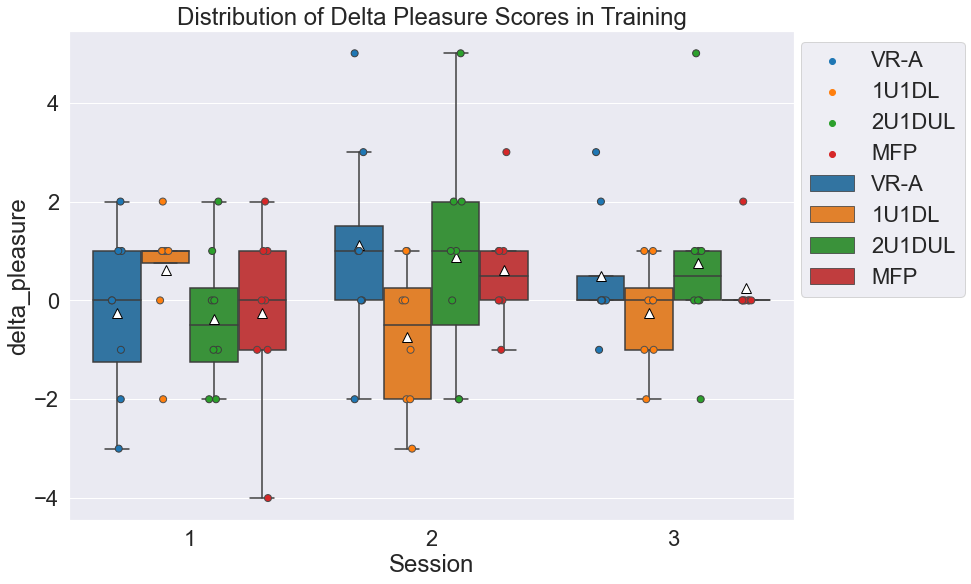

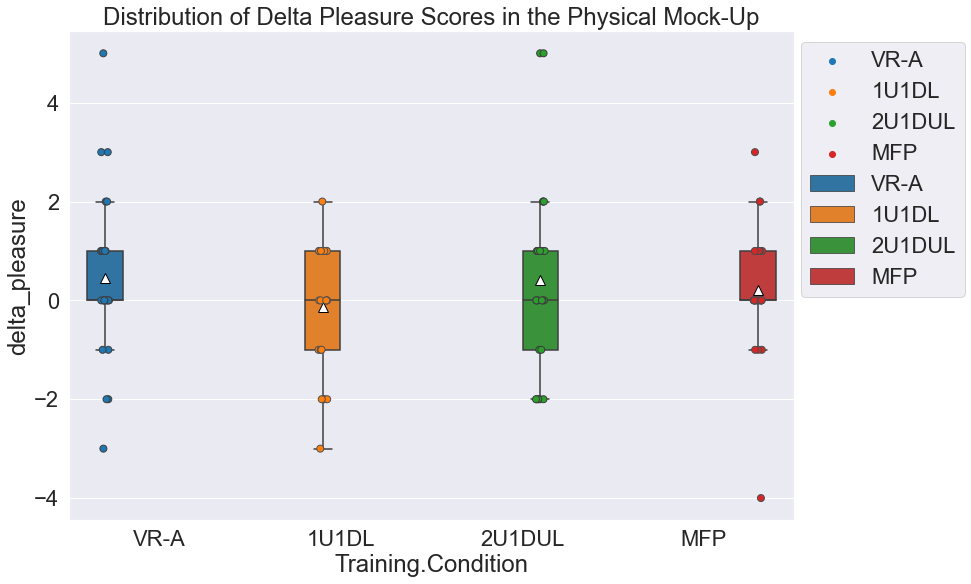

In [18]:
#DELTA PLEASURE 
#mixed anova in training 
AGPMA = pg.mixed_anova(data=AGdatALGOST, dv='delta_pleasure', between='Training.Condition', within='Session',
                     subject='Id', correction=False)
pg.print_table(AGPMA)



#one way anova in physical mock-up
AG_2U1DL = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='VR-A']
AG_2U1DUL = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='2U1DUL']
AG_1U1D = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='1U1DL']
AG_MFP = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='MFP']
f_oneway(AG_2U1DL['delta_pleasure'], 
         AG_2U1DUL['delta_pleasure'], 
        AG_1U1D['delta_pleasure'],
        AG_MFP['delta_pleasure'])



#plot in training
sns.set(font_scale=2)
plt.figure(figsize=(13,9)) 
p= sns.stripplot(x="Session", y="delta_pleasure", hue="Training.Condition",
              data=AGdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=7,palette=sns.color_palette('tab10', n_colors=4))

sns.boxplot(x="Session", y="delta_pleasure", hue="Training.Condition",
            data=AGdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=sns.color_palette('tab10', n_colors=4))
plt.title('Distribution of Delta Pleasure Scores in Training')
p.legend(bbox_to_anchor= (1.25,1))
plt.show()



#plot of delta_pleasure in physical mock up 
sns.set(font_scale=2)
plt.figure(figsize=(13,9)) 
p=sns.stripplot(x="Training.Condition", y="delta_pleasure", hue="Training.Condition",
              data=AGdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=7,palette=sns.color_palette('tab10', n_colors=4))

sns.boxplot(x="Training.Condition", y="delta_pleasure", hue="Training.Condition",
            data=AGdatALGOST,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=sns.color_palette('tab10', n_colors=4))
plt.title('Distribution of Delta Pleasure Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (1.25,1))
plt.show()


ANOVA SUMMARY

Source                 SS    DF1    DF2     MS      F    p-unc    np2      eps
------------------  -----  -----  -----  -----  -----  -------  -----  -------
Training.Condition  6.031      3     28  2.010  0.724    0.546  0.072  nan
Session             2.271      2     56  1.135  0.562    0.573  0.020    0.901
Interaction         3.312      6     56  0.552  0.273    0.947  0.028  nan



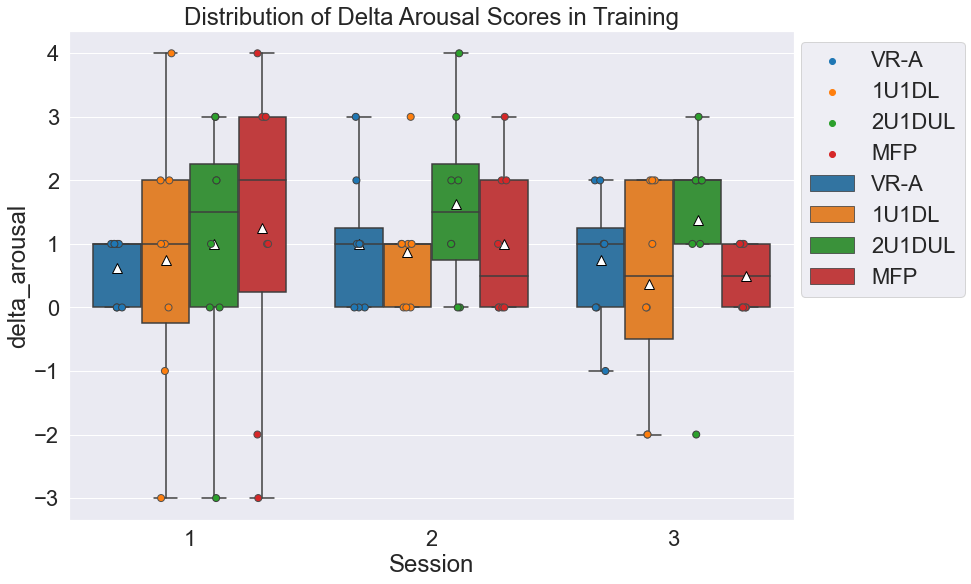

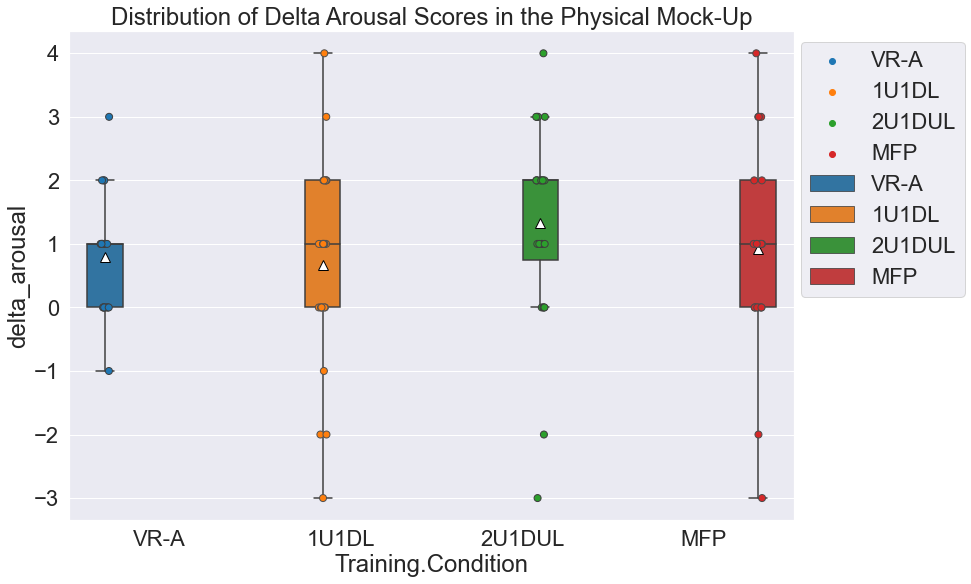

In [19]:
#DELTA AROUSAL


#mixed anova in training 
AGAMA = pg.mixed_anova(data=AGdatALGOST, dv='delta_arousal', between='Training.Condition', within='Session',
                     subject='Id', correction=False)
pg.print_table(AGAMA)



#one way anova in physical mock-up
AG_2U1DL = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='VR-A']
AG_2U1DUL = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='2U1DUL']
AG_1U1D = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='1U1DL']
AG_MFP = AGdatALGOSP.loc[AGdatALGOSP['Training.Condition']=='MFP']
f_oneway(AG_2U1DL['delta_arousal'], 
         AG_2U1DUL['delta_arousal'], 
        AG_1U1D['delta_arousal'],
        AG_MFP['delta_arousal'])



#plot in training
sns.set(font_scale=2)
plt.figure(figsize=(13,9)) 
p= sns.stripplot(x="Session", y="delta_arousal", hue="Training.Condition",
              data=AGdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=7,palette=sns.color_palette('tab10', n_colors=4))

sns.boxplot(x="Session", y="delta_arousal", hue="Training.Condition",
            data=AGdatALGOST,fliersize=0,
           showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=sns.color_palette('tab10', n_colors=4))
plt.title('Distribution of Delta Arousal Scores in Training')
p.legend(bbox_to_anchor= (1.25,1))
plt.show()



#plot of delta_arousal in physical mock up 
sns.set(font_scale=2)
plt.figure(figsize=(13,9)) 
p=sns.stripplot(x="Training.Condition", y="delta_arousal", hue="Training.Condition",
              data=AGdatALGOST, jitter=True,
               dodge=True,linewidth=1,edgecolor='gray',size=7,palette=sns.color_palette('tab10', n_colors=4))

sns.boxplot(x="Training.Condition", y="delta_arousal", hue="Training.Condition",
            data=AGdatALGOST,fliersize=0, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette=sns.color_palette('tab10', n_colors=4))
plt.title('Distribution of Delta Arousal Scores in the Physical Mock-Up')
p.legend(bbox_to_anchor= (1.25,1))
plt.show()